In [4]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


텍스트를 보고 긍정평가(1)인지 부정평가(0)인지 확인해보고자 한다.

나이브 베이즈 분류기를 통해 데이터 테스트를 해보고 혼동 행렬과 분류성능평가지표를 보고 정확도를 살펴보자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# tsv 파일을 다루고 있기 때문에 elimiter에 \t를 넣는다. quiting에 3을 넣어서 큰따옴포를 삭제.
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [18]:
Liked = dataset[dataset['Liked'] == 1]
Liked.head()

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1


In [7]:
# 단어들을 숫자화 시킨다.
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
df_cv = cv.fit_transform(dataset['Review']) # text열의 단어들을 숫자로 변환
df_cv.shape

(1000, 2035)

# 나이브 분류기를 이용한 데이터 테스트

In [25]:
# 나이브베이즈 불러오기
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = dataset['Liked'].values
NB_classifier.fit(df_cv, label)

MultinomialNB()

In [21]:
# 훈련, 테스트로 분류 작업
X = df_cv
y = label
y.shape # X와 행렬이 맞는지 확인

(1000,)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# 평가

<AxesSubplot:>

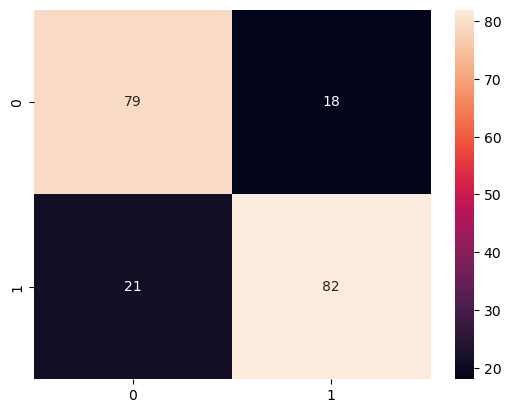

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

# 각각 참 값과 예측값을 넣어본다.
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [24]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        97
           1       0.82      0.80      0.81       103

    accuracy                           0.81       200
   macro avg       0.80      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200

